In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 12)
pd.set_option('display.expand_frame_repr', False)
%matplotlib widget

In [33]:
maxLoc = 511

def loadAndPlot(name, plotRho=True, plotPressure=True, plotVx=True, plotVy=True, plotVz=True, plotBx=True, plotBy=True, plotBz=True):
    # Load Data
    fileName = 'athena++-results/' + name
    rawData  = np.loadtxt(fileName, skiprows=2)
    
    cellNumber      = rawData[:,0].astype('int')
    rho             = rawData[:,2]
    press           = rawData[:,3]
    Vx              = rawData[:,4]
    Vy              = rawData[:,5]
    Vz              = rawData[:,6]
    BxCellCentered  = rawData[:,7]
    ByCellCentered  = rawData[:,8]
    BzCellCentered  = rawData[:,9]

    BxFaceCentered  = np.zeros(BxCellCentered.size)
    ByFaceCentered  = np.zeros(BxCellCentered.size)
    BzFaceCentered  = np.zeros(BxCellCentered.size)

    for i in range(BxCellCentered.size-1):
        BxFaceCentered[i] = 0.5 * (BxCellCentered[i] + BxCellCentered[i+1])
        ByFaceCentered[i] = 0.5 * (ByCellCentered[i] + ByCellCentered[i+1])
        BzFaceCentered[i] = 0.5 * (BzCellCentered[i] + BzCellCentered[i+1])
        
    # Plotting
    plotFig = plt.figure(name)
    plotFig.clear()
    plt.plot(cellNumber[:-1], rho[:-1],            linestyle='-', color='tab:green',  label='Density')  if plotRho      else None
    plt.plot(cellNumber[:-1], press[:-1],          linestyle='-', color='tab:pink',   label='Pressure') if plotPressure else None
    plt.plot(cellNumber[:-1], Vx[:-1],             linestyle='-', color='tab:olive',  label='Vx')       if plotVx       else None
    plt.plot(cellNumber[:-1], Vy[:-1],             linestyle='-', color='tab:red',    label='Vy')       if plotVy       else None
    plt.plot(cellNumber[:-1], Vz[:-1],             linestyle='-', color='tab:orange', label='Vz')       if plotVz       else None
    plt.plot(cellNumber[:-1], BxFaceCentered[:-1], linestyle='-', color='tab:blue',   label='Bx')       if plotBx       else None
    plt.plot(cellNumber[:-1], ByFaceCentered[:-1], linestyle='-', color='tab:purple', label='By')       if plotBy       else None
    plt.plot(cellNumber[:-1], BzFaceCentered[:-1], linestyle='-', color='tab:cyan',   label='Bz')       if plotBz       else None
    
    plt.xlabel('Cell Number')
    plt.ylabel('Value')
    
    plt.grid()
    plt.legend()
    plt.show()
    
    frame = pd.DataFrame({'cellNumber':cellNumber,
                          'Density':rho,
                          'Pressure':press,
                          'Vx':Vx,
                          'Vy':Vy,
                          'Vz':Vz,
                          'Bx':BxFaceCentered,
                          'By':ByFaceCentered,
                          'Bz':BzFaceCentered})
    frame.set_index('cellNumber')
    return frame
    
    
def printData(nameLocationList, data):
    '''
    This function prints out pretty results for all the locations given. Each
    element in the list is a pair, the first is the location and the second
    element is the name of that location. Note that this function doesn't sort
    them and so if you want them sorted then you must sort them yourself
    '''
    
    prettyTable = pd.DataFrame(columns = ['cellNumber', 'Density', 'Pressure', 'Vx', 'Vy', 'Vz', 'Bx', 'By', 'Bz'])
    for pair in nameLocationList:
        prettyTable.loc[pair[1]] = [pair[0],
                                    data.loc[(pair[0],'Density')],
                                    data.loc[(pair[0],'Pressure')],
                                    data.loc[(pair[0],'Vx')],
                                    data.loc[(pair[0],'Vy')],
                                    data.loc[(pair[0],'Vz')],
                                    data.loc[(pair[0],'Bx')],
                                    data.loc[(pair[0],'By')],
                                    data.loc[(pair[0],'Bz')]]
    # End loop
    # Print results
    print(prettyTable)

In [ ]:
# Brio & Wu Shock Tube
bwData = loadAndPlot('Brio-Wu-out.tab', plotVz=False, plotBz=False, plotBx=False)

# | Waves, left to right  | Location, Left Side | Location, Right Side |
# |-----------------------|---------------------|----------------------|
# | Fast rarefaction      | 166                 | 217                  |
# | Compound wave         | 240                 | 251                  |
# | Compound wave Peak    | 243                 | n/a                  |
# | Contact discontinuity | 281                 | 292                  |
# | Slow shock            | 330                 | 333                  |
# | Fast rarefaction      | 420                 | 448                  |

printData([(166, 'leftFastRareLeftSide'),
           (217, 'leftFastRareRightSide'),
           (240, 'compoundLeftSide'),
           (243, 'compoundPeak'),
           (251, 'compoundRightSide'),
           (281, 'contactLeftSide'),
           (292, 'contactRightSide'),
           (330, 'slowShockLeftSide'),
           (333, 'slowShockRightSide'),
           (420, 'rightFastRareLeftSide'),
           (448, 'rightFastRareRightSide')], bwData)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
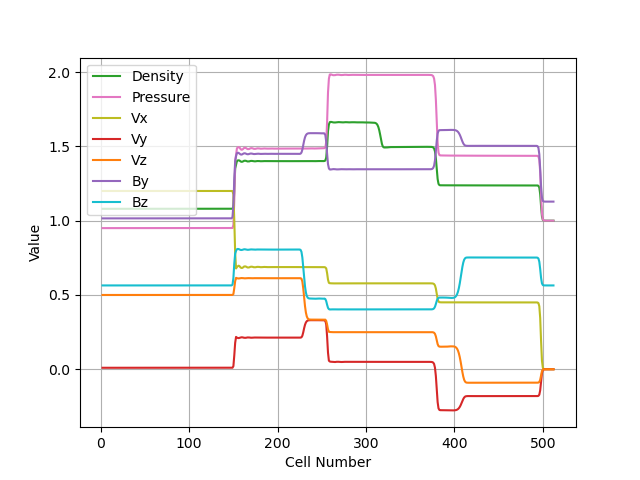

In [24]:
dwData = loadAndPlot('Dai-Woodward-out.tab', plotBx=False)

# | Waves, left to right  | Location, Left Side | Location, Right Side |
# |-----------------------|---------------------|----------------------|
# | Fast Shock            |                  |                   |
# | Rotation Wave         |                  |                   |
# | Slow Shock            |                  |                   |
# | Contact Discontinuity |                  |                   |
# | Slow Shock            |                  |                   |
# | Rotation Wave         |                  |                   |
# | Fast Shock            |                  |                   |

printData([(1, 'leftFastShockLeftSide'),
           (1, 'leftFastShockRightSide'),
           (1, 'leftRotationLeftSide'),
           (1, 'leftRotationRightSide'),
           (1, 'leftSlowShockLeftSide'),
           (1, 'leftSlowShockRightSide'),
           (1, 'contactLeftSide'),
           (1, 'contactRightSide'),
           (1, 'rightSlowShockLeftSide'),
           (1, 'rightSlowShockRightSide'),
           (1, 'rightRotationLeftSide'),
           (1, 'rightRotationRightSide'),
           (1, 'rightFastShockLeftSide'),
           (1, 'rightFastShockRightSide'),], bwData)

In [ ]:
rjData = loadAndPlot('Ryu-Jones-out.tab', plotBx=False)

In [ ]:
efrData = loadAndPlot('efr-out.tab', plotVy=False, plotVz=False, plotBx=False, plotBz=False)

In [ ]:
# leftOfLeftRare   = 75
# rightOfLeftRare  = 115
# centerOfCompound = 122
# leftOfContact    = 133
# rightOfContact   = 155
# rightOfSlowShock = 185
# rightOfRightRare = 232

# def printData(index, name):
#     print()
#     print(name, ' Data:')
#     print('Density  = ', rho[index])
#     print('Pressure = ', press[index])
#     print('VelX    = ', Vx[index])
#     print('VelY    = ', Vy[index])
#     print('VelZ    = ', Vz[index])
#     print('MagX    = ', BxFaceCentered[index])
#     print('MagY    = ', ByFaceCentered[index])
#     print('MagZ    = ', BzFaceCentered[index])
    
    
# printData(leftOfLeftRare, 'leftOfLeftRare')  
# printData(rightOfLeftRare, 'rightOfLeftRare')  
# printData(centerOfCompound, 'centerOfCompound') 
# printData(leftOfContact, 'leftOfContact')    
# printData(rightOfContact, 'rightOfContact')   
# printData(rightOfSlowShock, 'rightOfSlowShock') 
# printData(rightOfRightRare, 'rightOfRightRare')